# Iterating rarefaction

## Setup

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("tidyverse")
library("IRdisplay")
#Load processed but unrarefied data from main R community workshop
load("/pub14/tea/nsc206/NEOF/R_community/data/phyloseq.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




## Rarefaction iterations

In [2]:
#Number of rarefaction iterations to be carried out
#Using 10 here for speed, in real analysis i would suggest 1000
rarefaction_iters <- 10

## RNG vector creation

In [3]:
#Create rngseed vector
#Set seed for reproducibility
set.seed(2605)
#Create the rngseed vector
#Sample 10 (number of iters) values from the number range 1-100,000
rngseed_vec <- sample(x = 1:100000, size = rarefaction_iters, replace = FALSE)
#Print out vector
rngseed_vec
#Save our rngseed vector
save(rngseed_vec, file="rngseeds.RData")
#Reset seed
set.seed(NULL)

[1] 83222 81083 95789 71589 58150 81058 23302 68916 47820 17605

## Phyla relative abundance

In [4]:
#Reduce data for demonstrative purposes
# Subset phyloseq to only retain ENV samples
#I.e. remove the media samples
pseq_env <- phyloseq::subset_samples(pseq, media == "ENV")

#Aggregate to phyla level whilst aggregating rare phyla
pseq_env_phyla <- microbiome::aggregate_rare(
    pseq_env, level = "Phylum", 
    detection = 0.1, prevalence = 0.5,
    #Prevent info on aggregation to be printed out
    verbose = FALSE)
#View count table
phyloseq::otu_table(pseq_env_phyla)
#Sum count of sample
microbiome::readcount(pseq_env_phyla)
#Remove unwanted objects
rm(pseq, pseq_env)

,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
Actinobacteria,1584,1619,1783,3031,1685,2285,279,263,389
Bacteroidetes,6988,8630,9038,3897,3923,3537,3119,3020,2355
Cyanobacteria,211,252,300,617,479,619,396,500,478
Firmicutes,0,7,0,53,89,54,191,117,368
Fusobacteria,0,0,0,11,22,0,17,23,36
Nitrospirae,0,0,5,0,37,0,47,98,90
Other,0,2,0,280,224,250,54,91,122
Proteobacteria,3897,4894,5199,8326,9029,8234,6578,6866,6885
Unknown,4,34,15,428,612,430,168,223,253
Verrucomicrobia,16,133,95,257,371,355,197,180,148


LD_ENV_rep1 LD_ENV_rep2 LD_ENV_rep3 MD_ENV_rep1 MD_ENV_rep2 MD_ENV_rep3 
      12700       15571       16435       16900       16471       15764 
UD_ENV_rep1 UD_ENV_rep2 UD_ENV_rep3 
      11046       11381       11124

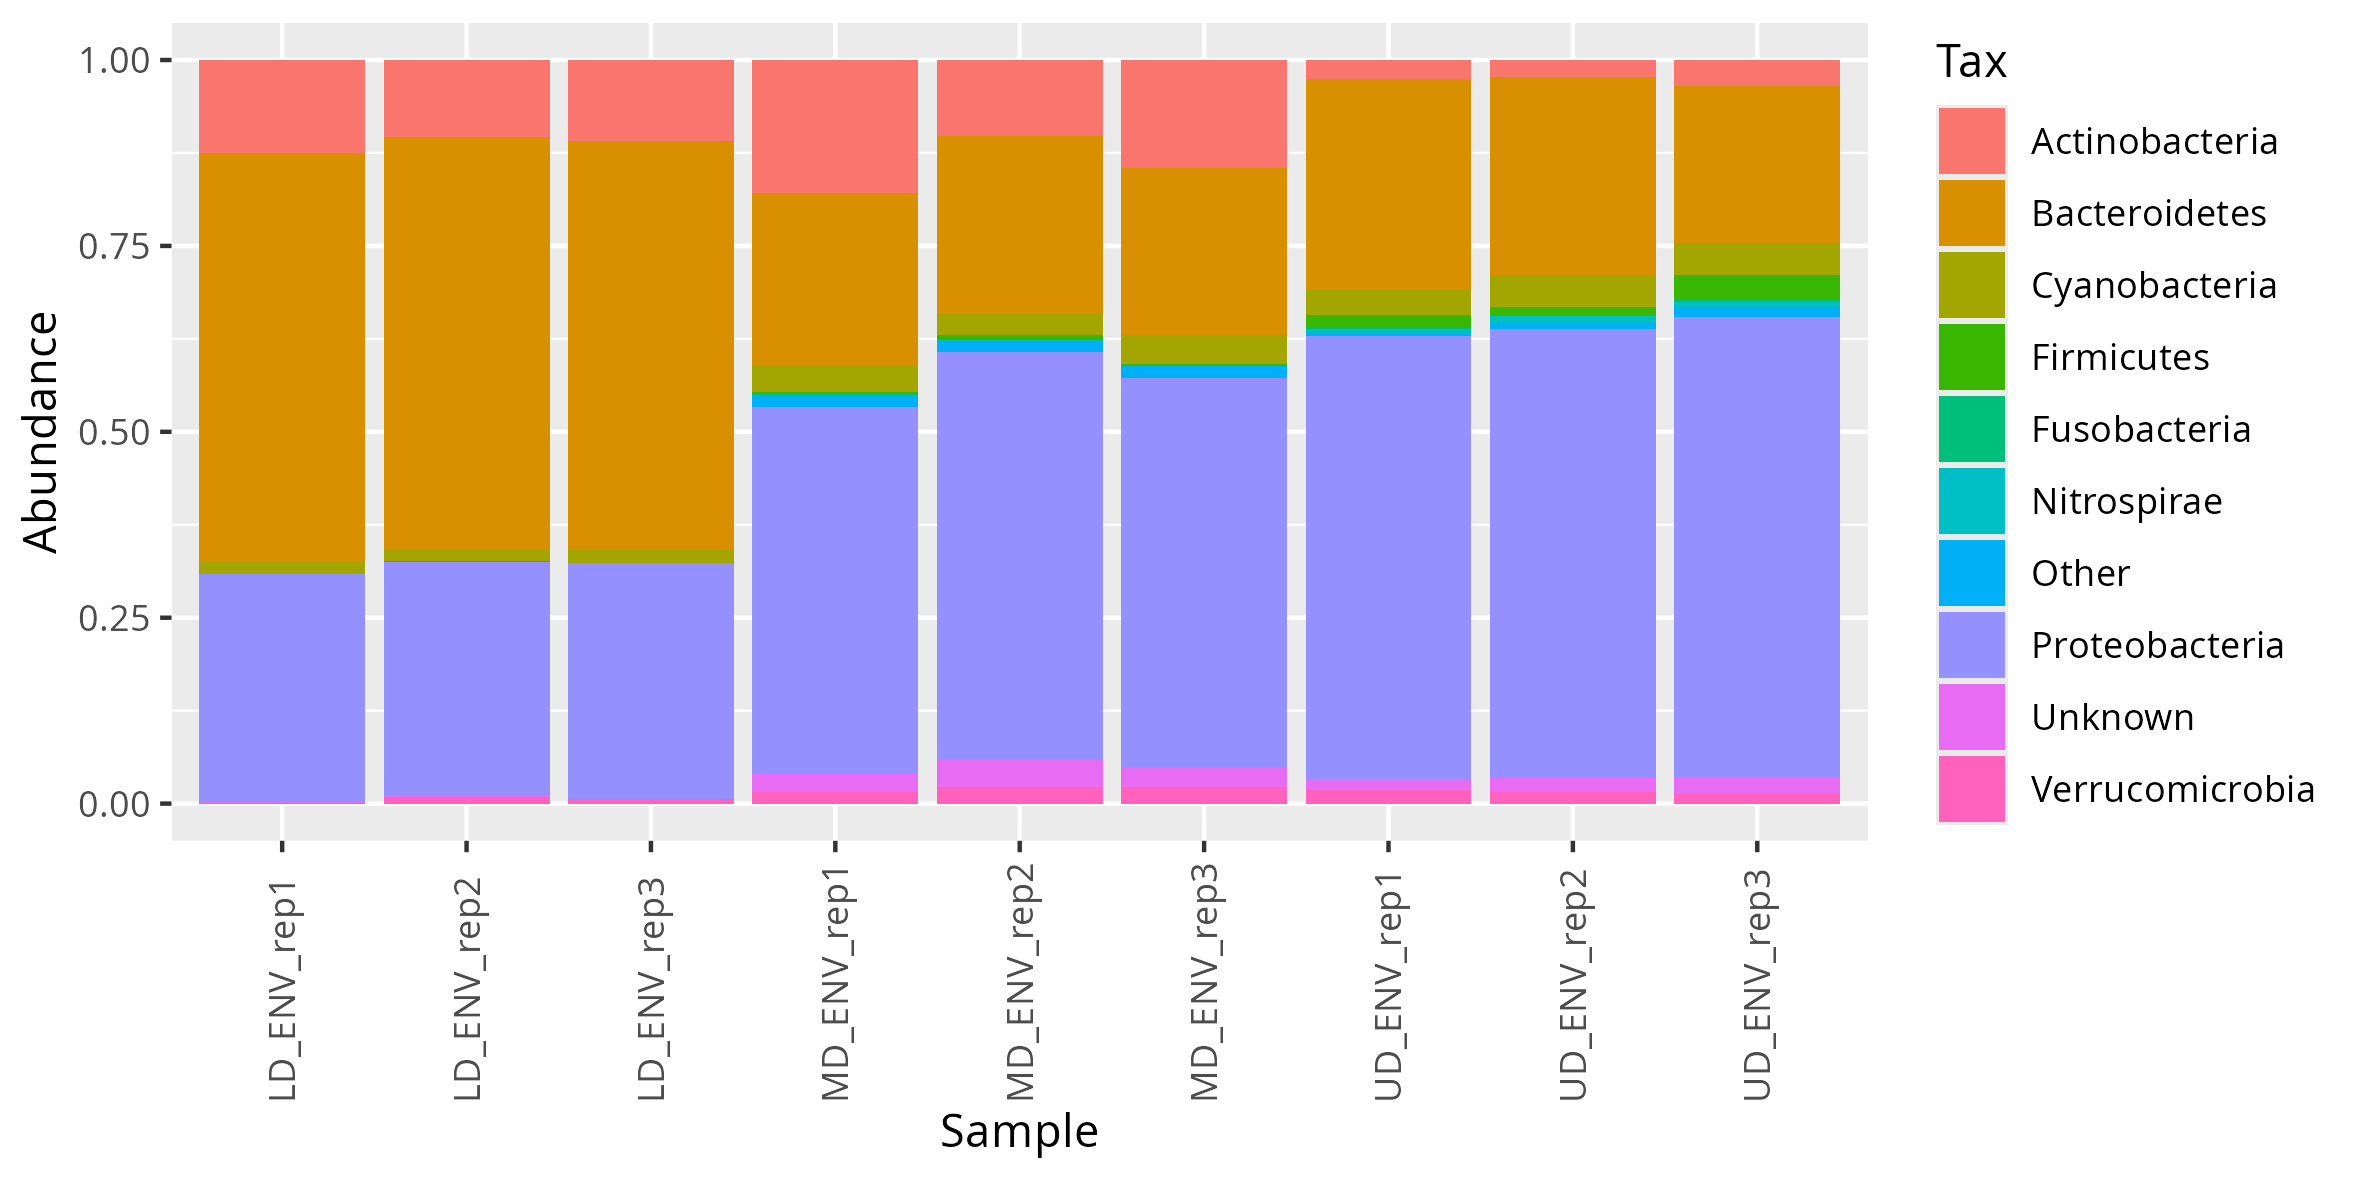

In [5]:
#Quick phyla bar chart of relative abundance
#Relative abundance transformation
pseq_env_phyla_relabund <- microbiome::transform(pseq_env_phyla, "compositional")
#Create, save, and display bar chart
phylum_bar <- microbiome::plot_composition(pseq_env_phyla_relabund)
ggsave(filename = "./env_phyla_relabund.png", plot = phylum_bar,
      device = "png", dpi = 300, units = "mm", height = 100, width = 200)
IRdisplay::display_png(file = "./env_phyla_relabund.png")

## One round rarefaction

In [6]:
#One round of rarefaction
pseq_env_phyla_rarefy_1 <- phyloseq::rarefy_even_depth(
    pseq_env_phyla,
    #Minimum read count as rarefaction size
    sample.size = min(microbiome::readcount(pseq_env_phyla)),
    #First random seed as the rng seed
    rngseed = rngseed_vec[1])
#View count table
otu_table(pseq_env_phyla_rarefy_1)
#Sum count of samples
microbiome::readcount(pseq_env_phyla_rarefy_1)

`set.seed(83222)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(83222); .Random.seed` for the full vector

...



,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
Actinobacteria,1353,1155,1232,1992,1120,1533,256,228,409
Bacteroidetes,6103,6024,6082,2497,2728,2466,3059,2951,2466
Cyanobacteria,181,184,210,364,324,427,399,477,479
Firmicutes,0,6,0,27,53,43,187,116,360
Fusobacteria,0,0,0,5,18,0,15,25,34
Nitrospirae,0,0,4,0,23,0,43,84,90
Other,0,1,0,194,174,169,49,92,107
Proteobacteria,3393,3556,3440,5492,5944,5854,6671,6684,6675
Unknown,3,33,8,282,390,329,159,204,273
Verrucomicrobia,13,87,70,193,272,225,208,185,153


LD_ENV_rep1 LD_ENV_rep2 LD_ENV_rep3 MD_ENV_rep1 MD_ENV_rep2 MD_ENV_rep3 
      11046       11046       11046       11046       11046       11046 
UD_ENV_rep1 UD_ENV_rep2 UD_ENV_rep3 
      11046       11046       11046

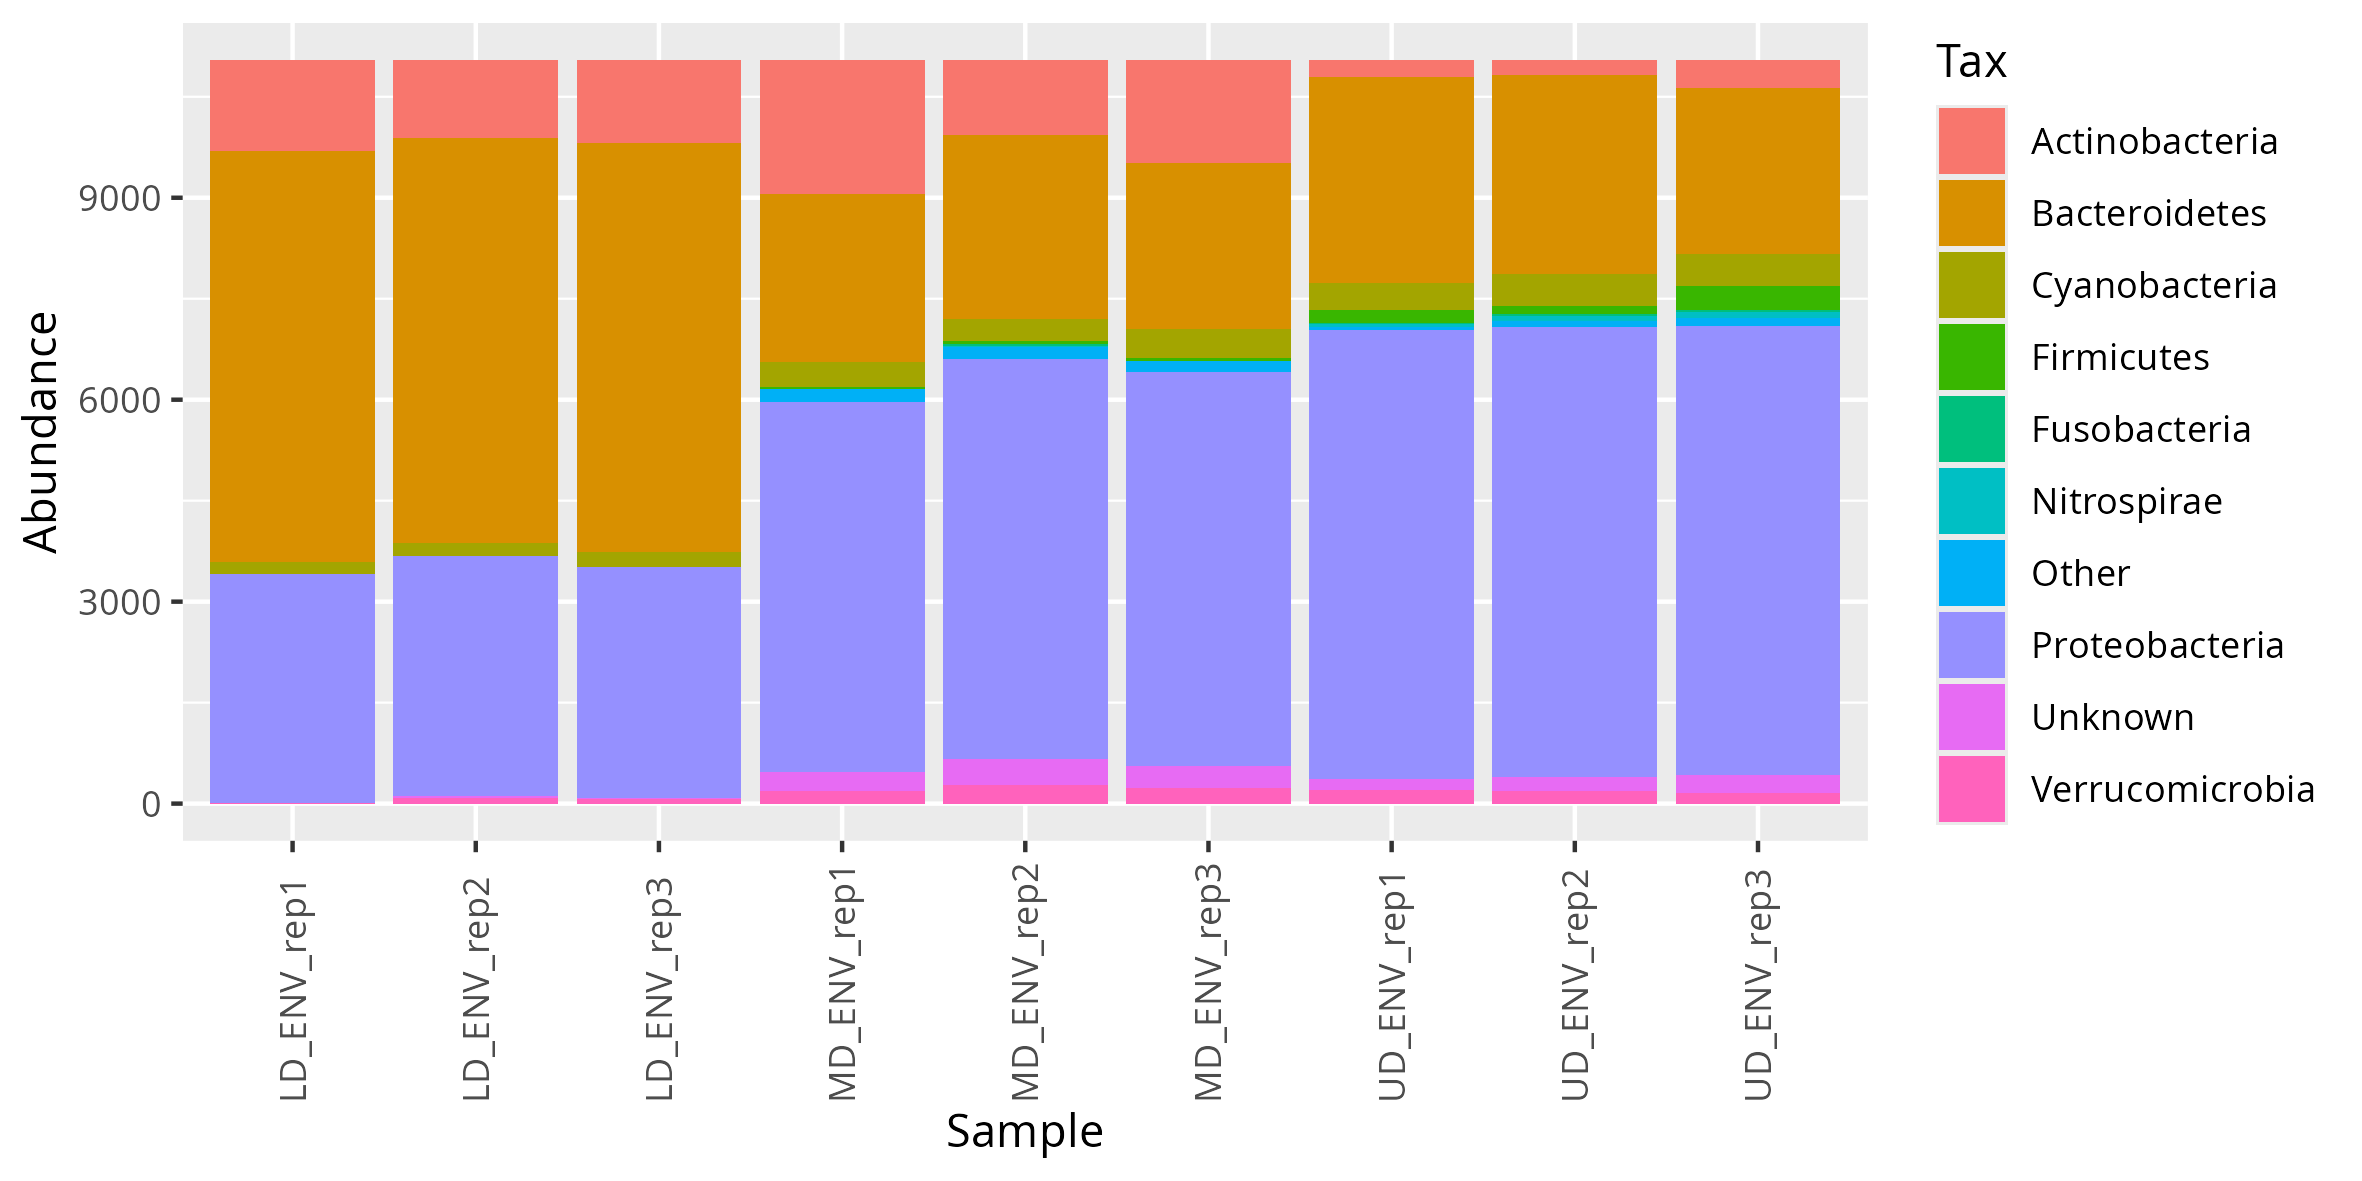

In [7]:
#Quick phyla bar chart of relative abundance of rarefied data
#Relative abundance transformation
pseq_env_phyla_rarefy_1_relabund <- microbiome::transform(pseq_env_phyla_rarefy_1, "compositional")
#Create, save, and display bar chart
phylum_bar <- microbiome::plot_composition(pseq_env_phyla_rarefy_1)
ggsave(filename = "./env_phyla_rarefy_1_relabund.png", plot = phylum_bar,
      device = "png", dpi = 300, units = "mm", height = 100, width = 200)
IRdisplay::display_png(file = "./env_phyla_rarefy_1_relabund.png")

In [8]:
#Value difference matrix
single_rarefaction_diff <- 
    phyloseq::otu_table(pseq_env_phyla_relabund) - phyloseq::otu_table(pseq_env_phyla_rarefy_1_relabund)
single_rarefaction_diff

,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
Actinobacteria,2.236631e-03,-5.873989e-04,-3.045604e-03,-0.0009876611,0.0009068441,0.0061672502,0.0020822017,0.0024677339,-0.0020575426
Bacteroidetes,-2.271475e-03,8.879653e-03,-6.826116e-04,0.0045370355,-0.0087910395,0.0011237522,0.0054318305,-0.0018009931,-0.0115438118
Cyanobacteria,2.281511e-04,-4.736819e-04,-7.576800e-04,0.0035557705,-0.0002504690,0.0006101563,-0.0002715915,0.0007498179,-0.0003939591
Firmicutes,0.000000e+00,-9.362940e-05,0.000000e+00,0.0006917709,0.0006053194,-0.0004672854,0.0003621220,-0.0002212473,0.0004906422
Fusobacteria,0.000000e+00,0.000000e+00,0.000000e+00,0.0001982350,-0.0002938683,0.0000000000,0.0001810610,-0.0002423507,0.0001582087
Nitrospirae,0.000000e+00,0.000000e+00,-5.789326e-05,0.0000000000,0.0001641707,0.0000000000,0.0003621220,0.0010062799,-0.0000571309
Other,0.000000e+00,3.791339e-05,0.000000e+00,-0.0009948714,-0.0021526485,0.0005592631,0.0004526525,-0.0003330244,0.0012805135
Proteobacteria,-3.196226e-04,-7.624261e-03,4.912135e-03,-0.0045308323,0.0100622371,-0.0076362404,-0.0084193373,-0.0018197420,0.0146408927
Unknown,4.336910e-05,-8.039605e-04,1.884423e-04,-0.0002041597,0.0018493155,-0.0025071966,0.0008147746,0.0011258365,-0.0019712115
Verrucomicrobia,8.294591e-05,6.653652e-04,-5.567888e-04,-0.0022652876,-0.0020998615,0.0021503006,-0.0009958356,-0.0009323107,-0.0005466011


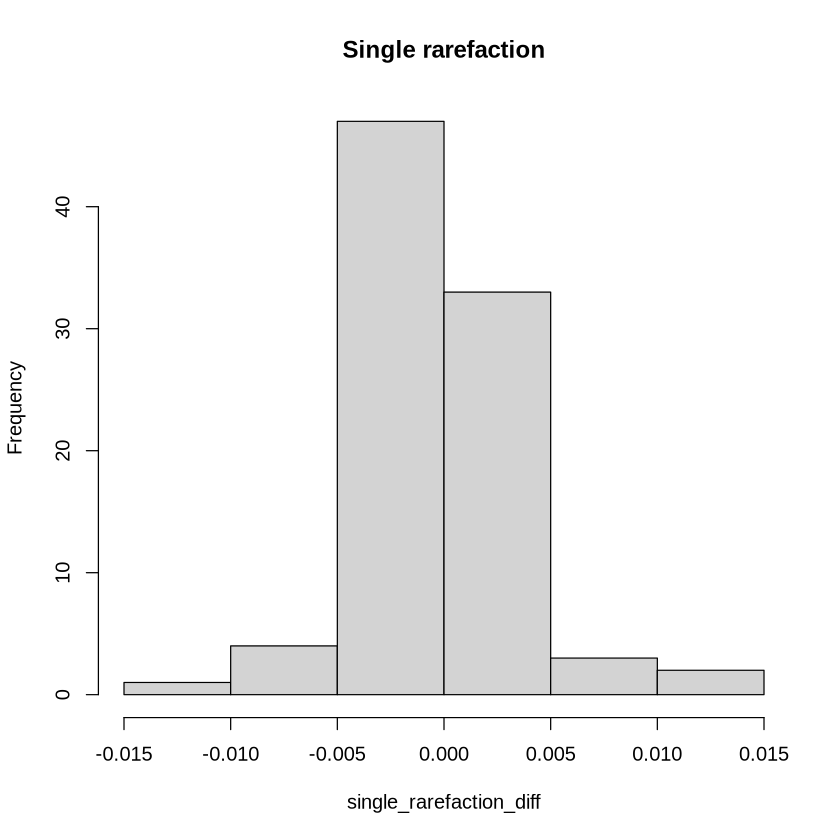

In [9]:
#Histogram of differences
hist(single_rarefaction_diff, main = "Single rarefaction")

## Multiple Rarefaction iterations

In [10]:
#Iterative rarefaction to produce an average rarefied abundance table

#Assign rarefaction size
rarefaction_size <- min(microbiome::readcount(pseq_env_phyla))
#Read in our rng seed vector
load("rngseeds.RData")

#Initialise where we will store the output
#In this case we create the first iteration
#Carry out first rarefaction
pseq_rarefy <- phyloseq::rarefy_even_depth(pseq_env_phyla,
                                             sample.size = rarefaction_size,
                                             rngseed = rngseed_vec[1])
rarefy_phyla_df <- as.data.frame(phyloseq::otu_table(pseq_rarefy))

#Loop through the next 9 iterations
#Add the rarefied values to rarefy_phyla_df
for (i in 2:length(rngseed_vec)){
    #Rarefy
    pseq_rarefy <- phyloseq::rarefy_even_depth(pseq_env_phyla,
                                             sample.size = rarefaction_size,
                                             rngseed = rngseed_vec[i])
    #Add values to rarefy_phyla_table
    rarefy_phyla_df <- 
        rarefy_phyla_df + as.data.frame(phyloseq::otu_table(pseq_rarefy))
}
#Average the values of the summed relabund phyla_table
rarefy_phyla_mean_df <- rarefy_phyla_df / length(rngseed_vec)
#Remove unwanted pseq_rarefy
rm(pseq_rarefy, rarefy_phyla_df)

`set.seed(83222)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(83222); .Random.seed` for the full vector

...

`set.seed(81083)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81083); .Random.seed` for the full vector

...

`set.seed(95789)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(95789); .Random.seed` for the full vector

...

`set.seed(71589)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(71589); .Random.seed` for the full vector

...

`set.seed(58150)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(58150); .Random.seed` for the full vector

...

`set.seed(81058

In [11]:
#View itertaive rarefied abundances
rarefy_phyla_mean_df

,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Actinobacteria,1359.7,1149.2,1205.0,1985.2,1134.6,1614.7,276.8,250.3,386.5
Bacteroidetes,6070.4,6113.3,6078.8,2531.0,2645.9,2465.5,3129.4,2922.6,2362.2
Cyanobacteria,185.5,180.7,207.8,406.0,321.6,429.2,398.7,485.7,472.5
Firmicutes,0.0,6.0,0.0,34.1,57.7,37.1,193.0,119.2,366.1
Fusobacteria,0.0,0.0,0.0,6.5,15.3,0.0,14.6,22.7,34.6
Nitrospirae,0.0,0.0,3.6,0.0,23.7,0.0,46.1,92.8,88.3
Other,0.0,1.8,0.0,186.2,156.4,170.4,55.8,90.5,120.1
Proteobacteria,3413.3,3479.2,3478.2,5445.2,6032.4,5778.5,6569.8,6667.6,6811.5
Unknown,2.4,26.3,8.8,281.0,411.5,308.4,167.9,216.4,251.1


In [12]:
#Convert to relative abundance table
rarefy_i10_relabund_phyla_df <- dplyr::mutate_all(rarefy_phyla_mean_df, prop.table)
rarefy_i10_relabund_phyla_df

,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Actinobacteria,0.1230943328,0.1040376607,0.1090892631,0.1797211660,0.102715915,0.146179613,0.025058845,0.022659786,0.034990042
Bacteroidetes,0.5495564005,0.5534401593,0.5503168568,0.2291327177,0.239534673,0.223202969,0.283306174,0.264584465,0.213851168
Cyanobacteria,0.0167934094,0.0163588629,0.0188122397,0.0367553866,0.029114612,0.038855694,0.036094514,0.043970668,0.042775665
Firmicutes,0.0000000000,0.0005431831,0.0000000000,0.0030870903,0.005223610,0.003358682,0.017472388,0.010791237,0.033143219
Fusobacteria,0.0000000000,0.0000000000,0.0000000000,0.0005884483,0.001385117,0.000000000,0.001321745,0.002055043,0.003132356
Nitrospirae,0.0000000000,0.0000000000,0.0003259098,0.0000000000,0.002145573,0.000000000,0.004173456,0.008401231,0.007993844
Other,0.0000000000,0.0001629549,0.0000000000,0.0168567807,0.014158972,0.015426399,0.005051602,0.008193011,0.010872714
Proteobacteria,0.3090077856,0.3149737462,0.3148832156,0.4929567264,0.546116241,0.523130545,0.594767337,0.603621220,0.616648561
Unknown,0.0002172732,0.0023809524,0.0007966685,0.0254390730,0.037253304,0.027919609,0.015200072,0.019590802,0.022732211


,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
Actinobacteria,1.630077e-03,-6.232192e-05,-6.012801e-04,-3.720536e-04,-4.149014e-04,-1.229092e-03,1.991671e-04,4.489036e-04,-2.060619e-05
Bacteroidetes,6.798200e-04,7.952783e-04,-3.929140e-04,1.458998e-03,-1.358485e-03,1.169017e-03,-9.415173e-04,7.700733e-04,-2.146745e-03
Cyanobacteria,-1.792362e-04,-1.749313e-04,-5.585129e-04,-2.465108e-04,-3.319580e-05,4.109892e-04,-2.444324e-04,-3.779754e-05,1.944892e-04
Firmicutes,0.000000e+00,-9.362940e-05,0.000000e+00,4.900433e-05,1.798260e-04,6.684464e-05,-1.810610e-04,-5.109449e-04,-6.159395e-05
Fusobacteria,0.000000e+00,0.000000e+00,0.000000e+00,6.243927e-05,-4.943589e-05,0.000000e+00,2.172732e-04,-3.413050e-05,1.038904e-04
Nitrospirae,0.000000e+00,0.000000e+00,-2.168105e-05,0.000000e+00,1.007994e-04,0.000000e+00,8.147746e-05,2.096114e-04,9.677096e-05
Other,0.000000e+00,-3.451101e-05,0.000000e+00,-2.887334e-04,-5.593116e-04,4.325204e-04,-1.629549e-04,-1.972286e-04,9.456385e-05
Proteobacteria,-2.157392e-03,-6.715177e-04,1.453870e-03,-2.940045e-04,2.059340e-03,-8.011870e-04,7.423502e-04,-3.350416e-04,2.283478e-03
Unknown,9.768741e-05,-1.974060e-04,1.160179e-04,-1.136292e-04,-9.709041e-05,-6.422681e-04,9.053051e-06,3.258176e-06,1.140665e-05
Verrucomicrobia,-7.095596e-05,4.390390e-04,4.500361e-06,-2.555103e-04,1.724543e-04,5.931758e-04,2.806446e-04,-3.167033e-04,-5.556542e-04


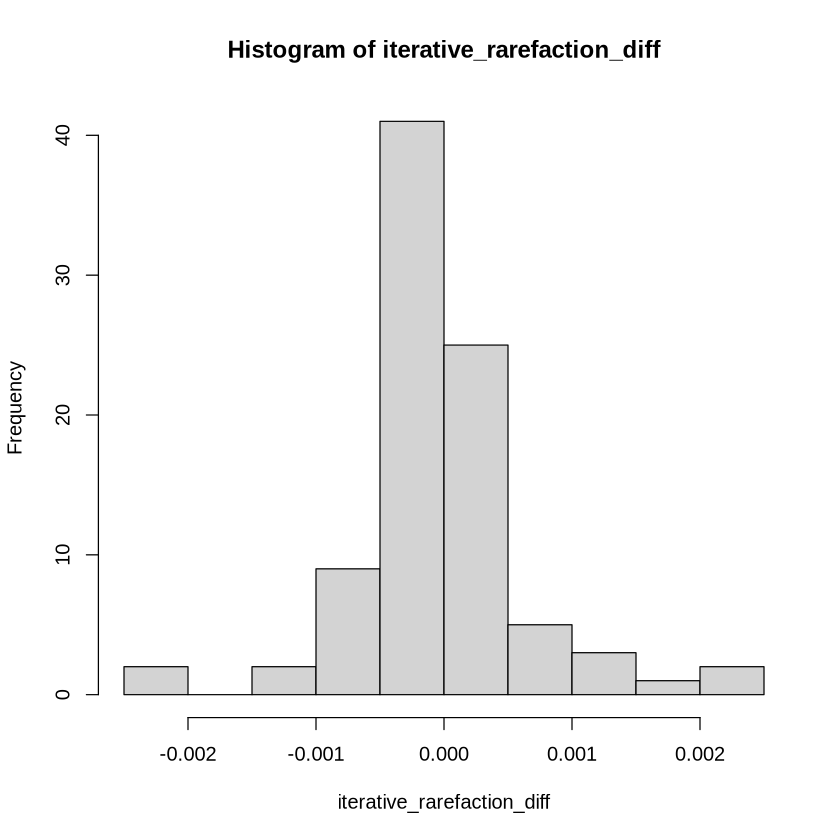

In [13]:
#Value difference matrix
iterative_rarefaction_diff <- as.matrix(otu_table(pseq_env_phyla_relabund) - rarefy_i10_relabund_phyla_df)
iterative_rarefaction_diff
#Histogram of differences
hist(iterative_rarefaction_diff)

## Task

In [14]:
#Number of rarefaction iterations to be carried out
rarefaction_iters <- 1000
#Create rngseed vector
#Set seed for reproducibility
set.seed(153478)
#Create the rngseed vector
#Sample 1000 (number of iters) values from the number range 1-100,000
rngseed_vec <- sample(x = 1:100000, size = rarefaction_iters, replace = FALSE)
#Save our rngseed vector
save(rngseed_vec, file="rngseeds_1000.RData")
#Reset seed
set.seed(NULL)

In [15]:
#Iterative rarefaction to produce an average rarefied abundance table

#Assign rarefaction size
rarefaction_size <- min(microbiome::readcount(pseq_env_phyla))
#Read in our rng seed vector
load("rngseeds_1000.RData")

#Initialise where we will store the output
#In this case we create the first iteration
#Carry out first rarefaction
pseq_rarefy <- phyloseq::rarefy_even_depth(pseq_env_phyla,
                                             sample.size = rarefaction_size,
                                             rngseed = rngseed_vec[1])
rarefy_phyla_df <- as.data.frame(phyloseq::otu_table(pseq_rarefy))

#Loop through the next 999 iterations
#Add the rarefied values to rarefy_phyla_df
for (i in 2:length(rngseed_vec)){
    #Rarefy
    pseq_rarefy <- phyloseq::rarefy_even_depth(pseq_env_phyla,
                                             sample.size = rarefaction_size,
                                             rngseed = rngseed_vec[i])
    #Add values to rarefy_phyla_table
    rarefy_phyla_df <- 
        rarefy_phyla_df + as.data.frame(phyloseq::otu_table(pseq_rarefy))
}
#Average the values of the summed relabund phyla_table
rarefy_phyla_mean_df <- rarefy_phyla_df / length(rngseed_vec)
#Remove unwanted pseq_rarefy
rm(pseq_rarefy, rarefy_phyla_df)

`set.seed(84076)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(84076); .Random.seed` for the full vector

...

`set.seed(52490)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(52490); .Random.seed` for the full vector

...

`set.seed(47280)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(47280); .Random.seed` for the full vector

...

`set.seed(12982)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(12982); .Random.seed` for the full vector

...

`set.seed(5288)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(5288); .Random.seed` for the full vector

...

`set.seed(73567)`

Try `set.seed(52314); .Random.seed` for the full vector

...

`set.seed(80146)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(80146); .Random.seed` for the full vector

...

`set.seed(70536)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(70536); .Random.seed` for the full vector

...

`set.seed(46739)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(46739); .Random.seed` for the full vector

...

`set.seed(26895)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(26895); .Random.seed` for the full vector

...

`set.seed(75350)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(7

Please record this for your records so others can reproduce.

Try `set.seed(88072); .Random.seed` for the full vector

...

`set.seed(6758)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(6758); .Random.seed` for the full vector

...

`set.seed(98867)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(98867); .Random.seed` for the full vector

...

`set.seed(15618)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(15618); .Random.seed` for the full vector

...

`set.seed(84259)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(84259); .Random.seed` for the full vector

...

`set.seed(9644)` was used to initialize repeatable random subsampling.

Please record this

Please record this for your records so others can reproduce.

Try `set.seed(25501); .Random.seed` for the full vector

...

`set.seed(95792)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(95792); .Random.seed` for the full vector

...

`set.seed(65350)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(65350); .Random.seed` for the full vector

...

`set.seed(57425)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(57425); .Random.seed` for the full vector

...

`set.seed(31671)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(31671); .Random.seed` for the full vector

...

`set.seed(51050)` was used to initialize repeatable random subsampling.

Please record t

Please record this for your records so others can reproduce.

Try `set.seed(12319); .Random.seed` for the full vector

...

`set.seed(842)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(842); .Random.seed` for the full vector

...

`set.seed(35904)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(35904); .Random.seed` for the full vector

...

`set.seed(52375)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(52375); .Random.seed` for the full vector

...

`set.seed(45227)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(45227); .Random.seed` for the full vector

...

`set.seed(66932)` was used to initialize repeatable random subsampling.

Please record this 

Please record this for your records so others can reproduce.

Try `set.seed(35120); .Random.seed` for the full vector

...

`set.seed(84403)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(84403); .Random.seed` for the full vector

...

`set.seed(66395)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(66395); .Random.seed` for the full vector

...

`set.seed(99707)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(99707); .Random.seed` for the full vector

...

`set.seed(70561)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(70561); .Random.seed` for the full vector

...

`set.seed(7736)` was used to initialize repeatable random subsampling.

Please record th

Please record this for your records so others can reproduce.

Try `set.seed(34758); .Random.seed` for the full vector

...

`set.seed(39688)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(39688); .Random.seed` for the full vector

...

`set.seed(74289)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(74289); .Random.seed` for the full vector

...

`set.seed(38362)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(38362); .Random.seed` for the full vector

...

`set.seed(93541)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(93541); .Random.seed` for the full vector

...

`set.seed(80590)` was used to initialize repeatable random subsampling.

Please record t

`set.seed(45424)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(45424); .Random.seed` for the full vector

...

`set.seed(59940)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(59940); .Random.seed` for the full vector

...

`set.seed(93515)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(93515); .Random.seed` for the full vector

...

`set.seed(45832)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(45832); .Random.seed` for the full vector

...

`set.seed(71115)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(71115); .Random.seed` for the full vector

...

`set.seed(59854

Try `set.seed(92524); .Random.seed` for the full vector

...

`set.seed(16451)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(16451); .Random.seed` for the full vector

...

`set.seed(5717)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(5717); .Random.seed` for the full vector

...

`set.seed(49293)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(49293); .Random.seed` for the full vector

...

`set.seed(6553)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(6553); .Random.seed` for the full vector

...

`set.seed(98911)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(98911

Please record this for your records so others can reproduce.

Try `set.seed(2226); .Random.seed` for the full vector

...

`set.seed(54770)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(54770); .Random.seed` for the full vector

...

`set.seed(46805)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(46805); .Random.seed` for the full vector

...

`set.seed(45799)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(45799); .Random.seed` for the full vector

...

`set.seed(70012)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(70012); .Random.seed` for the full vector

...

`set.seed(73443)` was used to initialize repeatable random subsampling.

Please record th

`set.seed(40091)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(40091); .Random.seed` for the full vector

...

`set.seed(36499)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(36499); .Random.seed` for the full vector

...

`set.seed(69377)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(69377); .Random.seed` for the full vector

...

`set.seed(33604)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(33604); .Random.seed` for the full vector

...

`set.seed(33377)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(33377); .Random.seed` for the full vector

...

`set.seed(48032

Try `set.seed(37402); .Random.seed` for the full vector

...

`set.seed(93058)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(93058); .Random.seed` for the full vector

...

`set.seed(90007)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(90007); .Random.seed` for the full vector

...

`set.seed(31893)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(31893); .Random.seed` for the full vector

...

`set.seed(61042)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(61042); .Random.seed` for the full vector

...

`set.seed(31545)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(3

Please record this for your records so others can reproduce.

Try `set.seed(29766); .Random.seed` for the full vector

...

`set.seed(43454)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(43454); .Random.seed` for the full vector

...

`set.seed(77169)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(77169); .Random.seed` for the full vector

...

`set.seed(24933)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(24933); .Random.seed` for the full vector

...

`set.seed(33197)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(33197); .Random.seed` for the full vector

...

`set.seed(1658)` was used to initialize repeatable random subsampling.

Please record th

Please record this for your records so others can reproduce.

Try `set.seed(60913); .Random.seed` for the full vector

...

`set.seed(81820)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81820); .Random.seed` for the full vector

...

`set.seed(32349)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(32349); .Random.seed` for the full vector

...

`set.seed(58711)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(58711); .Random.seed` for the full vector

...

`set.seed(60805)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(60805); .Random.seed` for the full vector

...

`set.seed(38502)` was used to initialize repeatable random subsampling.

Please record t

Please record this for your records so others can reproduce.

Try `set.seed(35531); .Random.seed` for the full vector

...

`set.seed(63709)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(63709); .Random.seed` for the full vector

...

`set.seed(32778)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(32778); .Random.seed` for the full vector

...

`set.seed(81282)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81282); .Random.seed` for the full vector

...

`set.seed(55719)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(55719); .Random.seed` for the full vector

...

`set.seed(19565)` was used to initialize repeatable random subsampling.

Please record t

Please record this for your records so others can reproduce.

Try `set.seed(64997); .Random.seed` for the full vector

...

`set.seed(84867)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(84867); .Random.seed` for the full vector

...

`set.seed(19063)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(19063); .Random.seed` for the full vector

...

`set.seed(94438)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(94438); .Random.seed` for the full vector

...

`set.seed(70427)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(70427); .Random.seed` for the full vector

...

`set.seed(17111)` was used to initialize repeatable random subsampling.

Please record t

`set.seed(63841)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(63841); .Random.seed` for the full vector

...

`set.seed(52721)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(52721); .Random.seed` for the full vector

...

`set.seed(28244)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(28244); .Random.seed` for the full vector

...

`set.seed(27006)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(27006); .Random.seed` for the full vector

...

`set.seed(31696)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(31696); .Random.seed` for the full vector

...

`set.seed(25823

Try `set.seed(53206); .Random.seed` for the full vector

...

`set.seed(55072)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(55072); .Random.seed` for the full vector

...

`set.seed(17288)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(17288); .Random.seed` for the full vector

...

`set.seed(60362)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(60362); .Random.seed` for the full vector

...

`set.seed(81575)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81575); .Random.seed` for the full vector

...

`set.seed(89210)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(8

Please record this for your records so others can reproduce.

Try `set.seed(56522); .Random.seed` for the full vector

...

`set.seed(63815)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(63815); .Random.seed` for the full vector

...

`set.seed(79711)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(79711); .Random.seed` for the full vector

...

`set.seed(24471)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(24471); .Random.seed` for the full vector

...

`set.seed(15088)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(15088); .Random.seed` for the full vector

...

`set.seed(50442)` was used to initialize repeatable random subsampling.

Please record t

Please record this for your records so others can reproduce.

Try `set.seed(89334); .Random.seed` for the full vector

...

`set.seed(94685)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(94685); .Random.seed` for the full vector

...

`set.seed(7575)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(7575); .Random.seed` for the full vector

...

`set.seed(11069)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(11069); .Random.seed` for the full vector

...

`set.seed(18389)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(18389); .Random.seed` for the full vector

...

`set.seed(56503)` was used to initialize repeatable random subsampling.

Please record thi

`set.seed(81502)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81502); .Random.seed` for the full vector

...

`set.seed(27930)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(27930); .Random.seed` for the full vector

...

`set.seed(12713)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(12713); .Random.seed` for the full vector

...

`set.seed(59054)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(59054); .Random.seed` for the full vector

...

`set.seed(42508)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(42508); .Random.seed` for the full vector

...

`set.seed(23069

Try `set.seed(1177); .Random.seed` for the full vector

...

`set.seed(87347)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(87347); .Random.seed` for the full vector

...

`set.seed(10733)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(10733); .Random.seed` for the full vector

...

`set.seed(78955)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(78955); .Random.seed` for the full vector

...

`set.seed(14223)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(14223); .Random.seed` for the full vector

...

`set.seed(32699)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(32

Please record this for your records so others can reproduce.

Try `set.seed(70919); .Random.seed` for the full vector

...

`set.seed(46330)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(46330); .Random.seed` for the full vector

...

`set.seed(17499)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(17499); .Random.seed` for the full vector

...

`set.seed(6110)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(6110); .Random.seed` for the full vector

...

`set.seed(17997)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(17997); .Random.seed` for the full vector

...

`set.seed(28498)` was used to initialize repeatable random subsampling.

Please record thi

Please record this for your records so others can reproduce.

Try `set.seed(37886); .Random.seed` for the full vector

...

`set.seed(26966)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(26966); .Random.seed` for the full vector

...

`set.seed(30899)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(30899); .Random.seed` for the full vector

...

`set.seed(81800)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(81800); .Random.seed` for the full vector

...

`set.seed(224)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(224); .Random.seed` for the full vector

...

`set.seed(73875)` was used to initialize repeatable random subsampling.

Please record this 

In [16]:
#Convert to relative abundance table
rarefy_i1000_relabund_phyla_df <- dplyr::mutate_all(rarefy_phyla_mean_df, prop.table)
rarefy_i1000_relabund_phyla_df

,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Actinobacteria,0.1246919247,0.1039573601,0.1084197900,0.1793910013,0.102301104,0.144930020,0.025263263,0.023112077,0.034978363
Bacteroidetes,0.5504416984,0.5543476372,0.5501346189,0.2306778924,0.238193102,0.224486058,0.282483252,0.265322922,0.211827358
Cyanobacteria,0.0165219084,0.0162103024,0.0182426218,0.0365521456,0.029127014,0.039110719,0.035866649,0.043891182,0.042966866
Firmicutes,0.0000000000,0.0004407025,0.0000000000,0.0031314503,0.005384574,0.003446134,0.017332700,0.010221438,0.033094061
Fusobacteria,0.0000000000,0.0000000000,0.0000000000,0.0006429477,0.001346913,0.000000000,0.001548162,0.002009596,0.003218903
Nitrospirae,0.0000000000,0.0000000000,0.0002972117,0.0000000000,0.002241445,0.000000000,0.004270234,0.008584193,0.008026344
Other,0.0000000000,0.0001234836,0.0000000000,0.0165163860,0.013624389,0.015838494,0.004872352,0.007960619,0.010947945
Proteobacteria,0.3067552960,0.3142059569,0.3162263263,0.4926171465,0.548120677,0.522423502,0.595288430,0.603485153,0.618857414
Unknown,0.0003259098,0.0021746334,0.0008901865,0.0252797393,0.037122397,0.027232844,0.015205776,0.019621854,0.022774579


,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,MD_ENV_rep1,MD_ENV_rep2,MD_ENV_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3
Actinobacteria,3.248477e-05,1.797864e-05,6.819299e-05,-4.188884e-05,-9.056898e-08,2.050026e-05,-5.250770e-06,-3.386848e-06,-8.927754e-06
Bacteroidetes,-2.054779e-04,-1.121995e-04,-2.106761e-04,-8.617647e-05,-1.691312e-05,-1.140715e-04,-1.185950e-04,3.161594e-05,-1.229355e-04
Cyanobacteria,9.226485e-05,-2.637070e-05,1.110504e-05,-4.326983e-05,-4.559848e-05,1.559648e-04,-1.656708e-05,4.168825e-05,3.288787e-06
Firmicutes,0.000000e+00,8.851141e-06,0.000000e+00,4.644376e-06,1.886274e-05,-2.060783e-05,-4.137244e-05,5.885409e-05,-1.243588e-05
Fusobacteria,0.000000e+00,0.000000e+00,0.000000e+00,7.939901e-06,-1.123202e-05,0.000000e+00,-9.143581e-06,1.131581e-05,1.734318e-05
Nitrospirae,0.000000e+00,0.000000e+00,7.017120e-06,0.000000e+00,4.927545e-06,0.000000e+00,-1.529966e-05,2.664926e-05,6.427051e-05
Other,0.000000e+00,4.960288e-06,0.000000e+00,5.166132e-05,-2.472891e-05,2.042548e-05,1.629549e-05,3.516322e-05,1.933300e-05
Proteobacteria,9.509767e-05,9.627159e-05,1.107592e-04,4.557542e-05,5.490416e-05,-9.414369e-05,2.212566e-04,-1.989743e-04,7.462439e-05
Unknown,-1.094920e-05,8.912985e-06,2.249985e-05,4.570451e-05,3.381670e-05,4.449631e-05,3.349629e-06,-2.779379e-05,-3.096163e-05
Verrucomicrobia,-3.420200e-06,1.595537e-06,-8.898155e-06,1.580963e-05,-1.394805e-05,-1.256380e-05,-3.467318e-05,2.486835e-05,-3.599149e-06


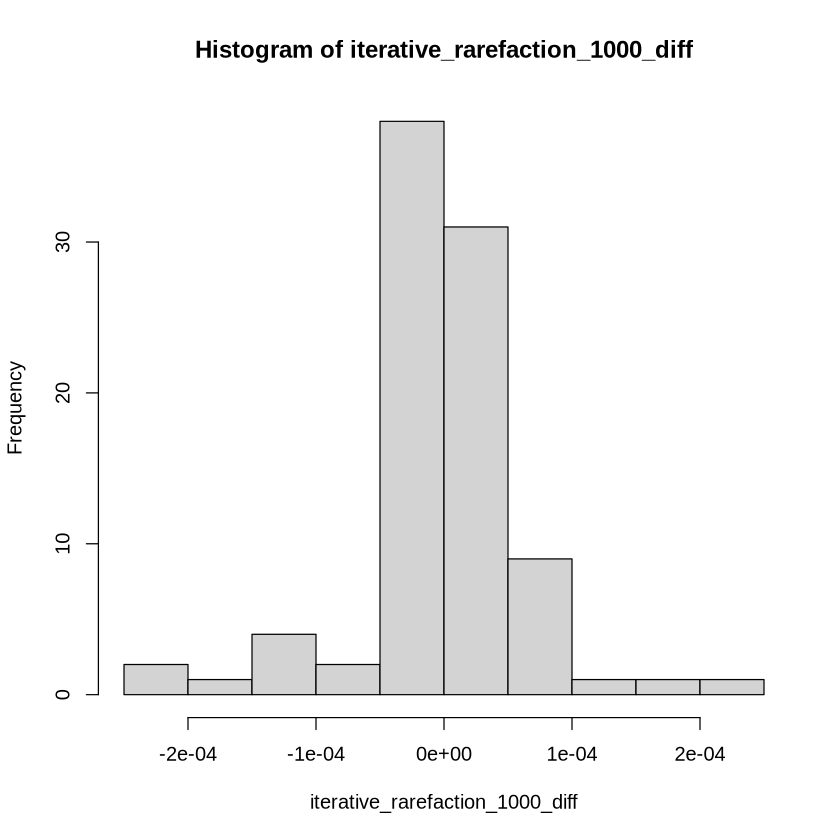

In [17]:
#Value difference matrix
iterative_rarefaction_1000_diff <- as.matrix(otu_table(pseq_env_phyla_relabund) - rarefy_i1000_relabund_phyla_df)
iterative_rarefaction_1000_diff
#Histogram of differences
hist(iterative_rarefaction_1000_diff)